# Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [39]:
ID = 240968774
sectors = np.array([17,18])

period = 5.9711424562
tdepth = 0.001231323616846885

lc_file = "TOI_1467_S17_18_58.csv"
contrastcurve_file = "TOI_1467_832nm.csv"

band = 'TESS'

# Downloading & Visualizing Data

In [31]:
target = tr.target(ID=ID, sectors=sectors)

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12836\1675860004.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap17, ap18])


Sector 17


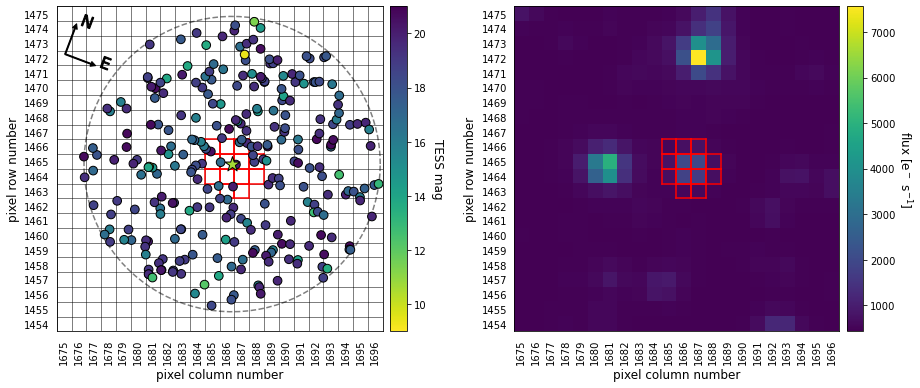

Sector 18


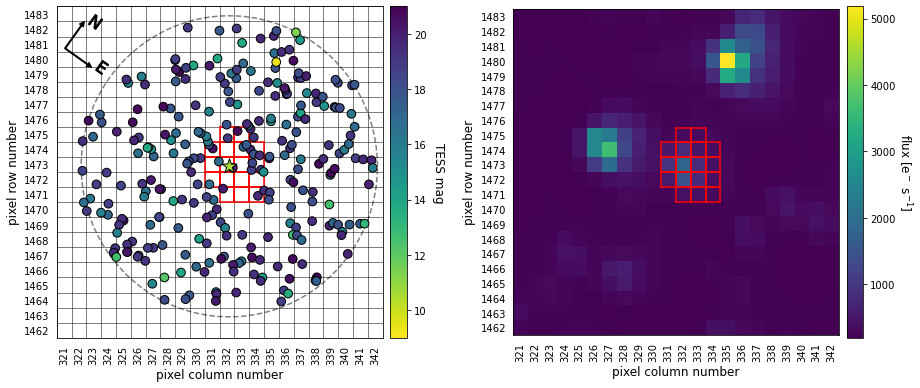

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,240968774,10.5977,9.380,8.791,8.568,19.113929,49.233780,0.488826,0.490737,3834.00,26.679300,0.000,0.000,9.714038e-01,0.001268
1,602264101,20.1211,NaN,NaN,NaN,19.116086,49.234115,NaN,NaN,NaN,NaN,5.210,76.635,1.508607e-04,0.000000
2,240968773,16.8007,15.770,15.558,14.920,19.107401,49.232925,0.880000,0.711585,5176.00,0.543496,15.652,258.660,2.926168e-03,0.000000
3,602272535,18.6427,NaN,NaN,NaN,19.125483,49.237533,NaN,NaN,5531.00,-0.309165,30.334,63.546,4.675839e-04,0.000000
4,602272536,18.4817,NaN,NaN,NaN,19.123414,49.239829,NaN,NaN,3444.00,1.693440,31.165,45.667,5.036719e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,240968730,16.6550,15.588,14.925,14.994,19.059456,49.191013,0.770000,0.933857,4758.00,0.526237,200.287,219.783,4.025611e-28,0.000000
267,602264145,20.6790,NaN,NaN,NaN,19.032843,49.216625,NaN,NaN,NaN,NaN,200.398,252.081,1.173032e-31,0.000000
268,602264143,19.3522,NaN,NaN,NaN,19.037341,49.209165,NaN,NaN,4772.00,-0.672445,200.703,243.828,1.763528e-31,0.000000
269,602272247,19.7174,NaN,NaN,NaN,19.199501,49.233375,NaN,NaN,NaN,1.755520,201.160,90.383,6.471851e-24,0.000000


In [40]:
ap17 = np.array([[1686,1463],[1687,1463],[1685,1464],[1686,1464],
                 [1687,1464],[1688,1464],[1685,1465],[1686,1465],
                 [1687,1465],[1688,1465],[1685,1466],[1686,1466],
                 [1687,1466]])

ap18 = np.array([[332,1471],[333,1471],[334,1471],[331,1472],[332,1472],
                 [333,1472],[334,1472],[331,1473],[332,1473],[333,1473],
                 [334,1473],[331,1474],[332,1474],[333,1474],[334,1474],
                 [332,1475],[333,1475]])

#ap58 = np.array([[759,1188],[760,1188],[761,1188],[762,1188],[759,1189],
#                 [760,1189],[761,1189],[762,1189],[759,1190],[760,1190],
#                 [761,1190],[762,1190],[760,1191],[761,1191],[762,1191]])

apertures = np.array([ap17, ap18])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [41]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,240968774,10.5977,9.380,8.791,8.568,19.113929,49.233780,0.488826,0.490737,3834.00,26.679300,0.000,0.000,9.714038e-01,0.001268
1,602264101,20.1211,NaN,NaN,NaN,19.116086,49.234115,NaN,NaN,NaN,NaN,5.210,76.635,1.508607e-04,0.000000
2,240968773,16.8007,15.770,15.558,14.920,19.107401,49.232925,0.880000,0.711585,5176.00,0.543496,15.652,258.660,2.926168e-03,0.420797
3,602272535,18.6427,NaN,NaN,NaN,19.125483,49.237533,NaN,NaN,5531.00,-0.309165,30.334,63.546,4.675839e-04,0.000000
4,602272536,18.4817,NaN,NaN,NaN,19.123414,49.239829,NaN,NaN,3444.00,1.693440,31.165,45.667,5.036719e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,240968730,16.6550,15.588,14.925,14.994,19.059456,49.191013,0.770000,0.933857,4758.00,0.526237,200.287,219.783,4.025611e-28,0.000000
267,602264145,20.6790,NaN,NaN,NaN,19.032843,49.216625,NaN,NaN,NaN,NaN,200.398,252.081,1.173032e-31,0.000000
268,602264143,19.3522,NaN,NaN,NaN,19.037341,49.209165,NaN,NaN,4772.00,-0.672445,200.703,243.828,1.763528e-31,0.000000
269,602272247,19.7174,NaN,NaN,NaN,19.199501,49.233375,NaN,NaN,NaN,1.755520,201.160,90.383,6.471851e-24,0.000000


In [42]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i, target.stars['ID'][i])

2 240968773
6 240968785
8 240968762
17 240968775
18 240968782
26 240968779
36 240968791


In [43]:
target.stars['tdepth'][2] = 0
target.stars['tdepth'][6] = 0
target.stars['tdepth'][8] = 0
target.stars['tdepth'][17] = 0
target.stars['tdepth'][18] = 0
target.stars['tdepth'][26] = 0
target.stars['tdepth'][36] = 0

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12836\2081447194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][2] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12836\2081447194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][6] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_12836\2081447194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['td

# Ploting CC File

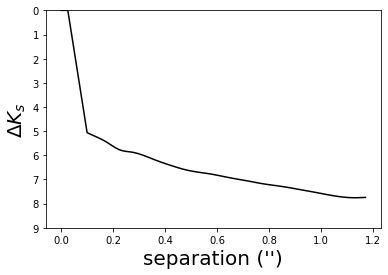

In [44]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

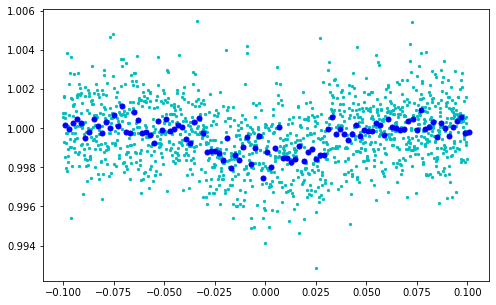

In [45]:
lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [46]:
%%time
FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP
    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 240968774.
Calculating EB and EBx2P scenario probabilities for 240968774.
Calculating PTP scenario probability for 240968774.
Calculating PEB and PEBx2P scenario probabilities for 240968774.
Calculating STP scenario probability for 240968774.
Calculating SEB and SEBx2P scenario probabilities for 240968774.
Calculating DTP scenario probability for 240968774.
Calculating DEB and DEBx2P scenario probabilities for 240968774.
Calculating BTP scenario probability for 240968774.
Calculating BEB and BEBx2P scenario probabilities for 240968774.
FPP =  2.1446589247853254e-06
NFPP =  0.0
Calculating TP scenario probabilitiey for 240968774.
Calculating EB and EBx2P scenario probabilities for 240968774.
Calculating PTP scenario probability for 240968774.
Calculating PEB and PEBx2P scenario probabilities for 240968774.
Calculating STP scenario probability for 240968774.
Calculating SEB and SEBx2P scenario probabilities for 240968774.
Calculating DTP scenario

In [47]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  7.2237720507573044e-06
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,240968774,TP,0.488826,0.490737,5.971142,88.600979,0.360433,0.359972,59.737039,1.883365,0.000000,0.000000,9.414547e-01
1,240968774,EB,0.488826,0.490737,5.971142,85.754020,1.816520,0.134830,51.258957,0.000000,0.447982,0.446448,1.875453e-28
2,240968774,EBx2P,0.488826,0.490737,11.942285,88.397695,0.772897,0.574267,172.455658,0.000000,0.481208,0.481349,1.241395e-08
3,240968774,PTP,0.488826,0.490737,5.971142,89.489480,0.208406,0.342189,331.984304,1.974809,0.000000,0.000000,0.000000e+00
4,240968774,PEB,0.488826,0.490737,5.971142,85.565249,1.764378,0.196649,59.965386,0.000000,0.464335,0.463079,2.262713e-29
5,240968774,PEBx2P,0.488826,0.490737,11.942285,88.059560,1.014850,0.419919,148.077368,0.000000,0.488820,0.489983,1.112739e-12
6,240968774,STP,0.371508,0.377971,5.971142,89.767121,0.112437,0.173481,333.883945,2.452700,0.000000,0.000000,0.000000e+00
7,240968774,SEB,0.100649,0.120931,5.971142,88.645972,1.290780,0.088650,156.002534,0.000000,0.022880,0.100000,2.139131e-24
8,240968774,SEBx2P,0.131474,0.160897,11.942285,88.955050,0.248480,0.884706,154.229987,0.000000,0.124995,0.153131,3.609776e-08
9,240968774,DTP,0.488826,0.490737,5.971142,89.739741,0.075715,0.348852,29.454195,1.863137,0.000000,0.000000,5.853805e-02


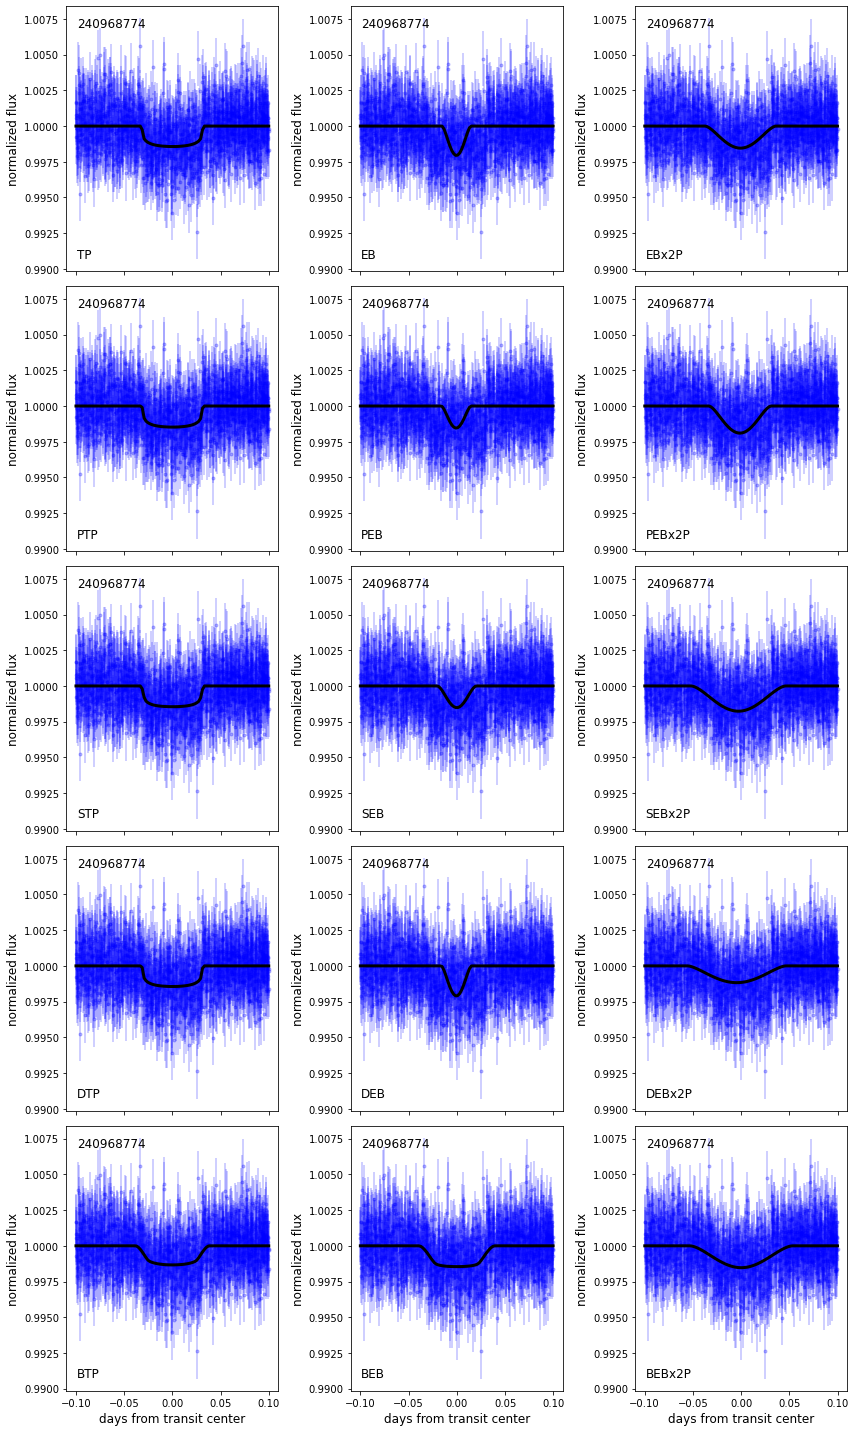

In [48]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [49]:
for i in range (len(FPPs)):
    print(FPPs[i],",")

print("NFPPs:")
for i in range (len(FPPs)):
    print(NFPPs[i],",")

2.1446589247853254e-06 ,
4.43485485879247e-06 ,
6.160040057601179e-06 ,
4.564261267936409e-06 ,
2.603444034132707e-06 ,
5.7407312633595e-06 ,
3.493775438623281e-06 ,
2.6142623691383093e-06 ,
5.268773512812075e-06 ,
3.236562459818515e-06 ,
6.6707344392735735e-06 ,
4.1283926615065525e-06 ,
9.915485174150085e-06 ,
7.390750201397012e-06 ,
3.5732622793993585e-06 ,
2.674540782177104e-06 ,
3.6715305898882278e-06 ,
6.205164750472392e-06 ,
8.969380192902499e-06 ,
7.2237720507573044e-06 ,
NFPPs:
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,
0.0 ,


In [26]:
##Vis 562nm

fpp=np.array([1.3009623501925027e-05 ,
9.54933731089902e-06 ,
1.9399894319205302e-05 ,
7.833363683484862e-06 ,
1.1489473351167234e-05 ,
1.1081457187644972e-05 ,
1.0963978960831788e-05 ,
1.2431236739773865e-05 ,
1.0705337759375766e-05 ,
1.1274513075032466e-05 ,
1.0181165478462262e-05 ,
1.561502702429607e-05 ,
7.5140527814321345e-06 ,
2.7433339188531747e-05 ,
8.305155423493638e-06 ,
8.06790569585214e-06 ,
9.628451010268435e-06 ,
1.6895703573105436e-05 ,
1.3537708663302617e-05 ,
9.05954745245019e-06])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

1.2198813609026748e-05 +/- 4.622361185773284e-06
0.0 +/- 0.0


In [50]:
##Tess 832nm

fpp=np.array([2.1446589247853254e-06 ,
4.43485485879247e-06 ,
6.160040057601179e-06 ,
4.564261267936409e-06 ,
2.603444034132707e-06 ,
5.7407312633595e-06 ,
3.493775438623281e-06 ,
2.6142623691383093e-06 ,
5.268773512812075e-06 ,
3.236562459818515e-06 ,
6.6707344392735735e-06 ,
4.1283926615065525e-06 ,
9.915485174150085e-06 ,
7.390750201397012e-06 ,
3.5732622793993585e-06 ,
2.674540782177104e-06 ,
3.6715305898882278e-06 ,
6.205164750472392e-06 ,
8.969380192902499e-06 ,
7.2237720507573044e-06])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

5.034218865446194e-06 +/- 2.1472021856492513e-06
0.0 +/- 0.0


In [14]:
##K filter

fpp=np.array([4.1546855850116415e-06 ,
3.944099939423573e-06 ,
5.912941797636684e-06 ,
4.96419017192995e-06 ,
3.041400297387753e-06 ,
2.0513012618517124e-06 ,
2.29398053475105e-06 ,
9.14822877828847e-06 ,
2.9561331215122166e-06 ,
3.139138483487791e-06 ,
2.8062544527029942e-06 ,
4.665803116976619e-06 ,
2.622590947964909e-06 ,
5.082384327281808e-06 ,
1.8267532204685466e-06 ,
6.089902150119286e-06 ,
2.6424188451779074e-06 ,
1.6078227040861037e-06 ,
2.7133928756084558e-06 ,
9.164603098854585e-06])
nfpp=np.array([0])

print(np.mean(fpp),"+/-",np.std(fpp))
print(np.mean(nfpp),"+/-",np.std(nfpp))

4.041401285526103e-06 +/- 2.126798897989018e-06
0.0 +/- 0.0
